**Importing the necessary libraries**

In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf

**Collecting data from yahoo finance api**

In [476]:

symbol = 'AAPL'
start_date = '2023-01-01'
end_date = '2023-10-09'
stock_data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


**Visualizing Close price**

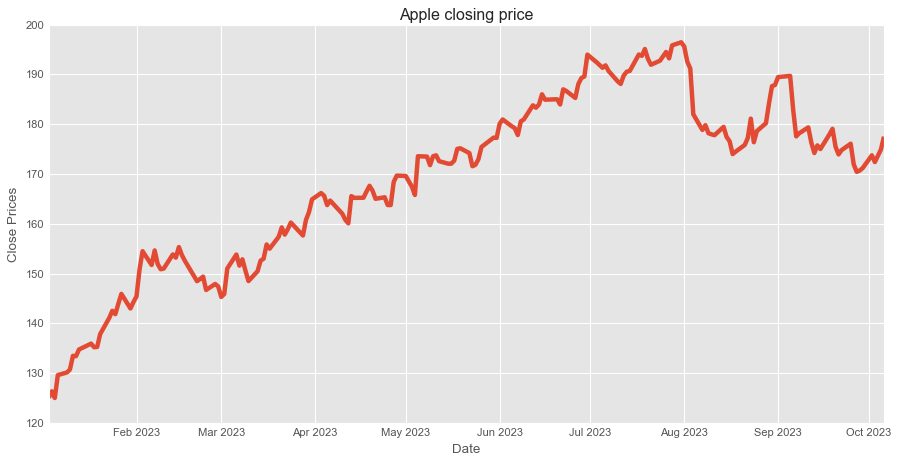

In [477]:
#plotting the close price
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('Apple closing price')
plt.show()

**Extracting features and target**

In [478]:
# Extract features (use 'Close' price as the feature)
X = np.array(stock_data['Close']).reshape(-1, 1)

# Extract target variable (next day's 'Close' price)
y = np.array(stock_data['Close'].shift(-1).dropna())

# Ensure X and y have the same length
X = X[:len(y)]

**Split the data into training and testing sets**

In [479]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

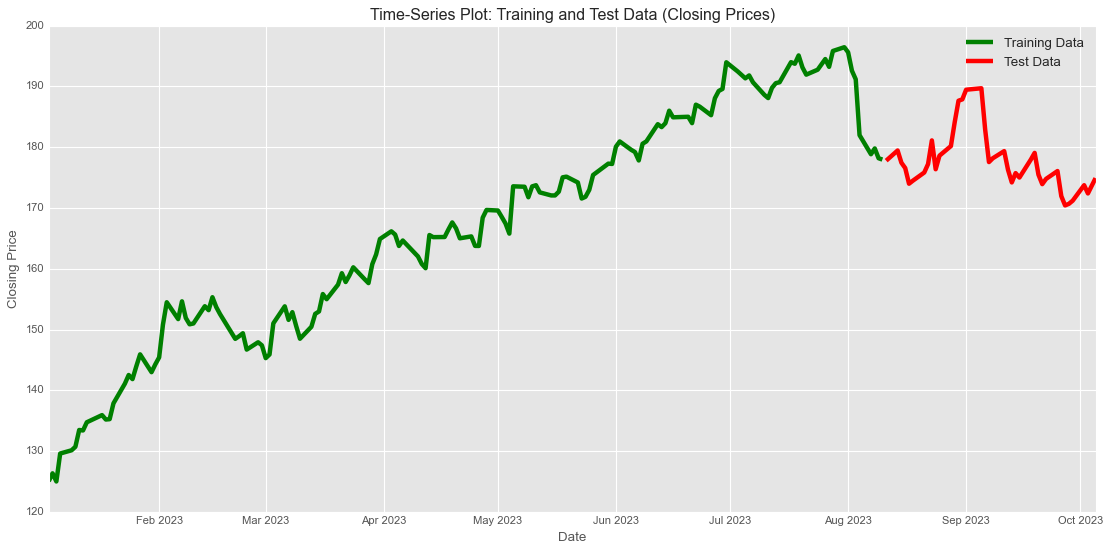

In [480]:
# Plot time-series plot for training and test data as closing prices
plt.figure(figsize=(14,7))
plt.style.use('ggplot')


# Plot training data
plt.plot(stock_data.index[:len(X_train)], stock_data['Close'][:len(X_train)], label='Training Data', linestyle='-', color='green')

# Plot test data
plt.plot(stock_data.index[len(X_train):len(X_train) + len(X_test)], stock_data['Close'][len(X_train):len(X_train) + len(X_test)], label='Test Data', linestyle='-', color='red')

plt.title('Time-Series Plot: Training and Test Data (Closing Prices)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

plt.tight_layout()
plt.show()


**Training the linear regression model**

In [481]:

model = LinearRegression()
model.fit(X_train, y_train)




LinearRegression()

**Making predictions on the test set**

In [482]:

predictions = model.predict(X_test)

**Plotting the scatter plot on the actual vs predicted price**

Text(0, 0.5, 'Stock Price')

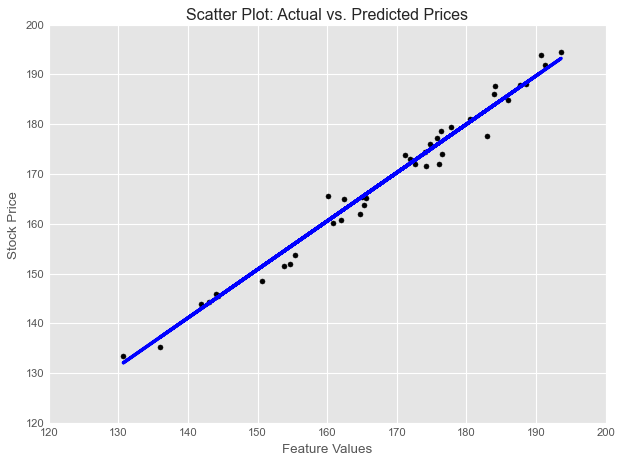

In [483]:

# Plot actual vs. predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)
plt.title('Scatter Plot: Actual vs. Predicted Prices')
plt.xlabel('Feature Values')
plt.ylabel('Stock Price')


**Plotting the time-series plot of actual vs predicted price**

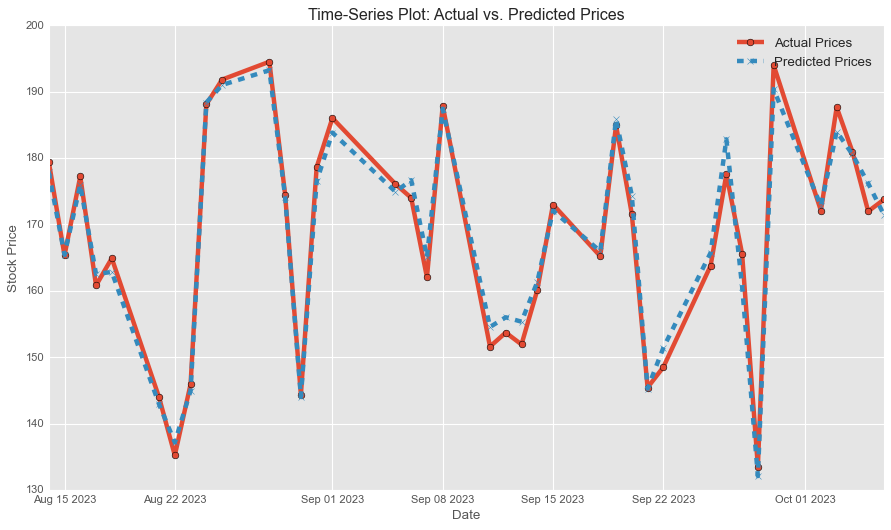

In [484]:
plt.figure(figsize=(12, 7))
plt.plot(stock_data.index[-len(y_test):], y_test, label='Actual Prices', marker='o')
plt.plot(stock_data.index[-len(y_test):], predictions, label='Predicted Prices', linestyle='dashed', marker='x')
plt.title('Time-Series Plot: Actual vs. Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()


**Printing the predictions along with dates**

In [485]:

print("\nPredictions along with Dates:")
for date, pred in zip(stock_data.index[-len(y_test):], predictions):
    print(f"{date.strftime('%Y-%m-%d')}: {pred:.2f}")


Predictions along with Dates:
2023-08-14: 177.84
2023-08-15: 165.43
2023-08-16: 175.94
2023-08-17: 162.52
2023-08-18: 162.84
2023-08-21: 142.92
2023-08-22: 137.17
2023-08-23: 144.96
2023-08-24: 188.35
2023-08-25: 191.00
2023-08-28: 193.22
2023-08-29: 174.15
2023-08-30: 144.03
2023-08-31: 176.47
2023-09-01: 183.82
2023-09-05: 174.92
2023-09-06: 176.65
2023-09-07: 165.08
2023-09-08: 187.42
2023-09-11: 154.55
2023-09-12: 156.01
2023-09-13: 155.35
2023-09-14: 161.33
2023-09-15: 172.05
2023-09-18: 165.95
2023-09-19: 185.83
2023-09-20: 174.35
2023-09-21: 145.28
2023-09-22: 151.40
2023-09-25: 165.73
2023-09-26: 182.81
2023-09-27: 160.65
2023-09-28: 132.10
2023-09-29: 190.37
2023-10-02: 172.76
2023-10-03: 183.99
2023-10-04: 180.54
2023-10-05: 176.18
2023-10-06: 171.44


**Calculating the means square error, r2_score**

In [486]:

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, predictions)

print(f"R-squared: {r2:.2f}")


Mean Squared Error: 5.143650934465111
R-squared: 0.98


**Plotting the Hostogram of the residual meaning the deviation of the predicted price from the actual Price** 

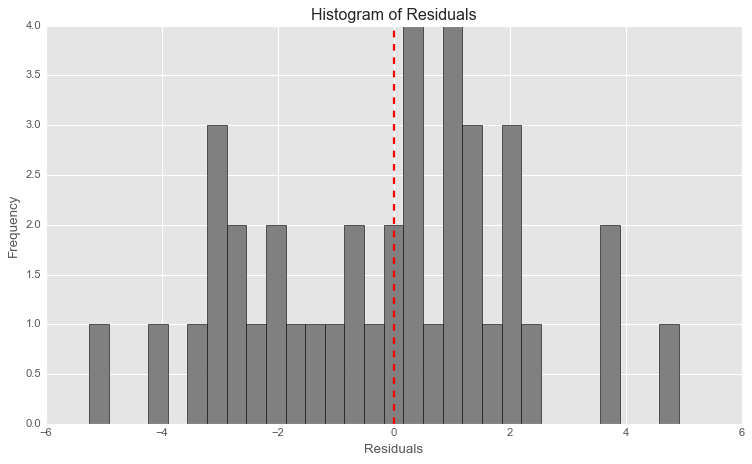

In [487]:
# Calculate residuals
residuals = y_test - predictions


plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='gray', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)  # Add a vertical line at x=0
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


**Transfering data to the CSV file**

In [488]:

predictions_df = pd.DataFrame({'Date': stock_data.index[-len(y_test):], 'Predicted Price': predictions})
df=predictions_df.to_csv('Predictions.csv')